<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week2/01_BasisFunction_FinancialMarket_Regression_M_Rakan_Bagus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pustaka yang diperlukan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.linear_model import LinearRegression  # Model Regresi Linear Standar
from sklearn.preprocessing import PolynomialFeatures  # Untuk membuat basis fungsi untuk regresi polinomial
from sklearn.metrics import mean_squared_error, r2_score  # Untuk evaluasi model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path ke file CSV
file_path = '/content/drive/MyDrive/Machine Learning/Dataset/FinancialMarket.csv'

# Membaca file CSV
data = pd.read_csv(file_path)

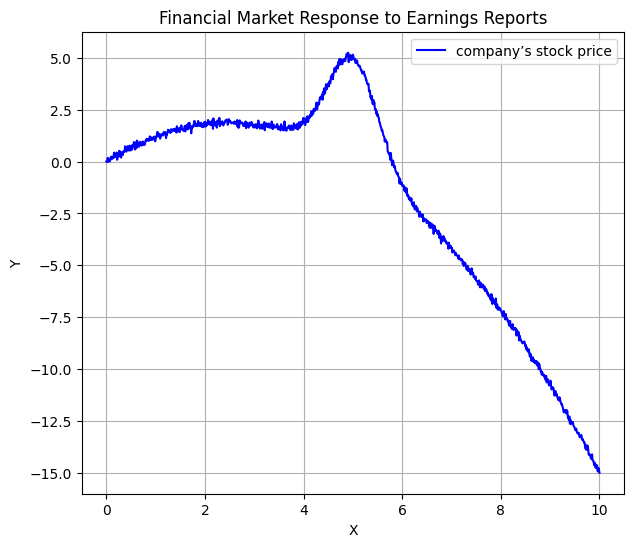

In [ ]:
# Extract the x and combined data columns
x = data['x'].values
combined_data = data['combined_data'].values

# Step 3: Visualize the dataset
plt.figure(figsize=(7, 6))

# Plot the combined data
plt.plot(x, combined_data, label='company’s stock price', color='blue')

# Add labels and title
plt.title('Financial Market Response to Earnings Reports')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()  # Ensure there's a label to show in the legend

# Display the plot
plt.show()

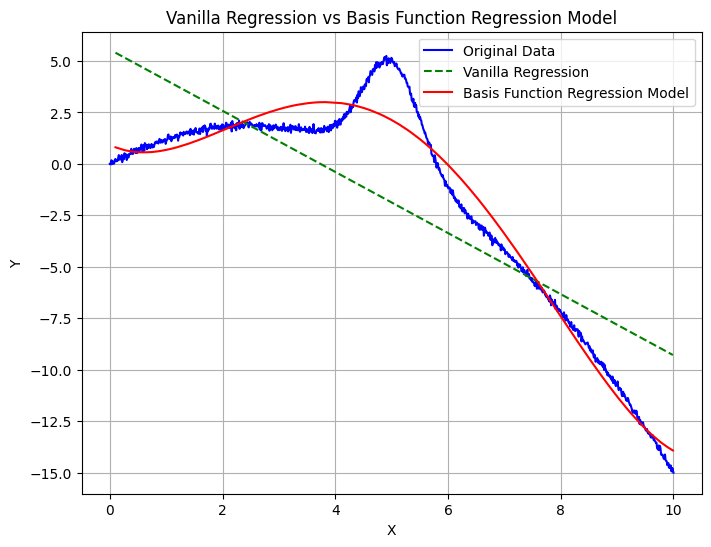

In [ ]:
data = pd.read_csv(file_path)  # Membaca file CSV dan memuatnya ke dalam variabel 'data'

# Ekstraksi fitur dan target
x = data['x'].values.reshape(-1, 1)  # Mengambil kolom 'x' sebagai fitur dan mengubah bentuknya
y = data['combined_data'].values  # Mengambil kolom 'combined_data' sebagai target

# Membagi data menjadi set pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Regresi Linear Sederhana
linear_model = LinearRegression()  # Membuat objek model regresi linear
linear_model.fit(x_train, y_train)  # Melatih model dengan data pelatihan
y_pred_linear = linear_model.predict(x_test)  # Memprediksi nilai menggunakan set data pengujian

# Model Regresi Polinomial (Basis Fungsi)
polynomial_features = PolynomialFeatures(degree=4)  # Membuat fitur polinomial dengan derajat 4
x_poly_train = polynomial_features.fit_transform(x_train)  # Transformasi data pelatihan ke bentuk polinomial
x_poly_test = polynomial_features.transform(x_test)  # Transformasi data pengujian ke bentuk polinomial

poly_model = LinearRegression()  # Membuat objek model regresi linear untuk data polinomial
poly_model.fit(x_poly_train, y_train)  # Melatih model dengan data polinomial
y_pred_poly = poly_model.predict(x_poly_test)  # Memprediksi nilai menggunakan set data pengujian polinomial

# Mengurutkan data uji berdasarkan nilai x untuk mendapatkan garis yang halus
sorted_indices = np.argsort(x_test.flatten())
x_test_sorted = x_test[sorted_indices]
y_pred_linear_sorted = y_pred_linear[sorted_indices]
y_pred_poly_sorted = y_pred_poly[sorted_indices]

# Menampilkan hasil plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', label='Original Data')  # Plot data asli dengan warna biru
plt.plot(x_test_sorted, y_pred_linear_sorted, color='green', linestyle='--', label='Vanilla Regression')  # Plot regresi linear yang sudah diurutkan
plt.plot(x_test_sorted, y_pred_poly_sorted, color='red', linestyle='-', label='Basis Function Regression Model')  # Plot regresi polinomial yang sudah diurutkan

# Menambahkan label dan judul
plt.title('Vanilla Regression vs Basis Function Regression Model')  # Menambahkan judul ke grafik
plt.xlabel('X')  # Memberi label sumbu X
plt.ylabel('Y')  # Memberi label sumbu Y
plt.grid(True)  # Menampilkan grid di grafik
plt.legend()  # Menampilkan legenda untuk grafik

# Menampilkan grafik
plt.show()

# Evaluasi Model
mse_linear = mean_squared_error(y_test, y_pred_linear)  # Menghitung Mean Squared Error untuk regresi linear
rmse_linear = np.sqrt(mse_linear)  # Menghitung Root Mean Squared Error untuk regresi linear
r2_linear = r2_score(y_test, y_pred_linear)  # Menghitung R² untuk regresi linear

mse_poly = mean_squared_error(y_test, y_pred_poly)  # Menghitung Mean Squared Error untuk regresi polinomial
rmse_poly = np.sqrt(mse_poly)  # Menghitung Root Mean Squared Error untuk regresi polinomial
r2_poly = r2_score(y_test, y_pred_poly)  # Menghitung R² untuk regresi polinomial

In [ ]:
# Menampilkan hasil evaluasi model
print("Vanilla Regression:")
print(f"MSE: {mse_linear}, RMSE: {rmse_linear}, R^2: {r2_linear}")  # Menampilkan nilai MSE, RMSE, dan R² untuk regresi linear
print("Basis Function Regression Model:")
print(f"MSE: {mse_poly}, RMSE: {rmse_poly}, R^2: {r2_poly}")  # Menampilkan nilai MSE, RMSE, dan R² untuk regresi polinomial

Vanilla Regression:
MSE: 9.401377787555104, RMSE: 3.0661666274935393, R^2: 0.6781603066194921
Basis Function Regression Model:
MSE: 0.965621104106871, RMSE: 0.9826602180341234, R^2: 0.9669436536760723


In [ ]:
# Menentukan model mana yang lebih baik
if mse_linear < mse_poly:
    print("Model yang lebih baik adalah Vanilla Regression (MSE lebih rendah).")
else:
    print("Model yang lebih baik adalah Basis Function Regression Model (MSE lebih rendah).")

Model yang lebih baik adalah Basis Function Regression Model (MSE lebih rendah).


##KESIMPULAN

Model regresi basis fungsi (polinomial) seringkali lebih baik dibandingkan model regresi linear sederhana (vanilla) karena kemampuannya untuk menangkap hubungan non-linear antara fitur dan target. Dengan menggunakan transformasi polinomial, model ini dapat menyesuaikan diri dengan variasi yang lebih kompleks dalam data, yang menghasilkan prediksi yang lebih akurat. Metrik evaluasi seperti Mean Squared Error (MSE) dan R² menunjukkan bahwa model basis fungsi cenderung memiliki kesalahan prediksi yang lebih rendah dan dapat menjelaskan proporsi variansi yang lebih tinggi dalam data. Fleksibilitas ini, meskipun berisiko overfitting, sering kali memberikan keuntungan yang signifikan dalam akurasi dan pemahaman pola data.